In [8]:
### select 190 pics from each class
import re
import os

categories = [item.replace("_"+item.split("_")[-1],"") for item in os.listdir("/Users/xinqunye/Desktop/2019spring/ml/data/image/mlImage/images")if not item.startswith("#")]
cate_dict = dict.fromkeys(categories)
for category in categories:
    cate_dict[category] = [animal for animal in os.listdir("/Users/xinqunye/Desktop/2019spring/ml/data/image/mlImage/images") if animal.startswith(category) and not animal.endswith("mat")]
save_file = open("annotations/new_list.txt","w")
for cate in cate_dict:
    for path in cate_dict[cate][0:190]:
        save_file.write(path+"\n")
save_file.close()

In [9]:
### #Image CLASS-ID SPECIES BREED ID
infos = [item for item in open("annotations/list.txt",'r') if not item.startswith("#")]
info_dict = {}
for category in categories:
    info_dict[category] = {"class": "","species": "","breed":""}
    info = [item.replace("\n","") for item in infos if item.startswith(category)][0].split(" ")
    info_dict[category]['class'] = int(info[-3])
    info_dict[category]['species'] = int(info[-2])
    info_dict[category]['breed'] = int(info[-1])
    
info_dict

{'Egyptian_Mau': {'class': 12, 'species': 1, 'breed': 6},
 'pug': {'class': 26, 'species': 2, 'breed': 18},
 'basset_hound': {'class': 4, 'species': 2, 'breed': 3},
 'Siamese': {'class': 33, 'species': 1, 'breed': 11},
 'shiba_inu': {'class': 32, 'species': 2, 'breed': 22},
 'Birman': {'class': 7, 'species': 1, 'breed': 3},
 'leonberger': {'class': 20, 'species': 2, 'breed': 14},
 'saint_bernard': {'class': 29, 'species': 2, 'breed': 19},
 'Abyssinian': {'class': 1, 'species': 1, 'breed': 1},
 'miniature_pinscher': {'class': 22, 'species': 2, 'breed': 15},
 'wheaten_terrier': {'class': 36, 'species': 2, 'breed': 24},
 'scottish_terrier': {'class': 31, 'species': 2, 'breed': 21},
 'pomeranian': {'class': 25, 'species': 2, 'breed': 17},
 'german_shorthaired': {'class': 15, 'species': 2, 'breed': 9},
 'english_setter': {'class': 14, 'species': 2, 'breed': 8},
 'newfoundland': {'class': 23, 'species': 2, 'breed': 16},
 'Sphynx': {'class': 34, 'species': 1, 'breed': 12},
 'British_Shorthair

In [14]:
### select 10 class
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images
cats = [item for item in info_dict if info_dict[item]['species'] == 1]
dogs = [item for item in info_dict if info_dict[item]['species'] == 2]


In [15]:
## read pic name
name = [item.replace(".jpg\n","") for item in open("annotations/list_rev.txt",'r')]

In [7]:
file_path = [item.strip('\n') for item in open("annotations/list_rev.txt",'r')]

This part we use the matplotlib to read image pixel. Because it's hard to download opencv and configurate the path. Also, matplotlib provides so many packages to calculate the image.

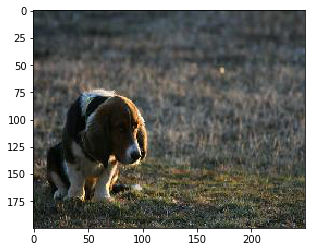

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline
img = mpimg.imread("newImage/basset_hound_144.jpg")
plt.imshow(img)

In [ ]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
X = np.array()
img_plots = []
for image_path in file_path:
    if image_path.endswith("mat"):
        continue
    img = mpimg.imread("mlImage/images/"+image_path)
    shape = img.shape
    #print(shape)
    #break
    #img_plots.append(plt.imshow(img))
    
    try:
        img = np.reshape(img,(shape[0],shape[1]*shape[2]))
    except:
        print(image_path)
        print(shape)
        continue
    img = img/255
    X.append(img)
X.shape

In [21]:
import os
import re

In [26]:
item = [item for item in open("annotations/list_rev.txt",'r') ][0]
re.findall(r"[0-9]+",item)

['132']

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "/Users/xinqunye/Desktop/2019spring/ml/data/image/mlImage/images/Abyssinian_1.jpg"
img = cv2.imread(img_path)
    #获取图片的宽和高
width,height = img.shape[:2][::-1]
    #将图片缩小便于显示观看
img_resize = cv2.resize(img,(int(width*0.5),int(height*0.5)),interpolation=cv2.INTER_CUBIC)
plt.imshow("img",img_resize)
print("img_reisze shape:{}".format(np.shape(img_resize)))

    #将图片转为灰度图
img_gray = cv2.cvtColor(img_resize,cv2.COLOR_RGB2GRAY)
plt.imshow("img_gray",img_gray)
print("img_gray shape:{}".format(np.shape(img_gray)))

In [2]:
import re
Y = [item.replace("_"+re.findall(r"[0-9]+",item)[0]+".jpg\n","") for item in open("annotations/list_rev.txt",'r')]


In [3]:

n_samples, n_features = X.shape
#_, h, w = lfw_people.images.shape
n_classes = set([item.strip("_"+item.split("_")[-1]) for item in file_path])
len(n_classes)

NameError: name 'X' is not defined

In [ ]:
print(np.sum(~np.isfinite(X)))
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))
print("Original Image Sizes {} by {}".format(h,w))
print (125*94) # the size of the images are the size of the feature vectors

In [ ]:
# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, names[y], h, w) # defaults to showing a 3 by 6 subset of the faces


### Using PCA with sklearn

In [6]:

from sklearn.decomposition import PCA

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

# print the components

print ('pca:', pca.components_)

NameError: name 'iris' is not defined

In [ ]:
import seaborn as sns
cmap = sns.set(style="darkgrid") 

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, iris.feature_names) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])